We can prove that under assumption $ (H): \rho(|| \Phi ||) < 1, $ the norm kernel matrix satisfies the following equation $$ (C): || \Phi || = I - \Sigma^{1/2} M || c ||^{-1/2} \mbox{ with } M \in O_d (R) \mbox{ and } \int_0^\infty \phi^{ij} \ge 0$$

# Simulation of the Hawkes process with $d$=10

In [27]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from mlpp.hawkesnoparam.estim import Estim
import mlpp.pp.hawkes as hk
import whma.simulation as simu
from mlpp.base.utils import TimeFunction
from whma.metrics import rel_err, rank_corr

In [49]:
# simulation of Hawkes processes
d = 20
mu = 0.5 * np.ones(d)
mus = simu.simulate_mu(d, mu=mu)
blocks = [5,5,10]
L = []
for x in blocks:
    L.append(np.random.rand(x, x))
Alpha_truth = scipy.linalg.block_diag(*L) / 6
# add noise
Alpha_truth += 0.01
Beta = np.random.rand(d**2).reshape((d,d))

In [50]:
#Alpha_truth[2,8] += 0.2

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


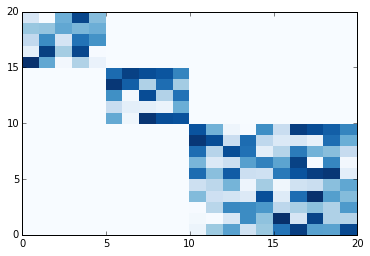

In [51]:
plt.pcolor(Alpha_truth[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

In [52]:
_, s, _ = np.linalg.svd(Alpha_truth)
print(s.max())
assert s.max() < 1, "Alpha_truth cannot generate a stable Hawkes process"

0.92374585646


In [53]:
kernels = [[hk.HawkesKernelExp(a, b) for (a, b) in zip(a_list, b_list)] for (a_list, b_list) in zip(Alpha_truth, Beta)]
h = hk.Hawkes(kernels=kernels, mus=list(mus))
h.simulate(10000)
estim = Estim(h, n_threads=8)

## Correlation matrix

In [54]:
from whma.utils import corr_matrix
Corr = corr_matrix(estim)

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


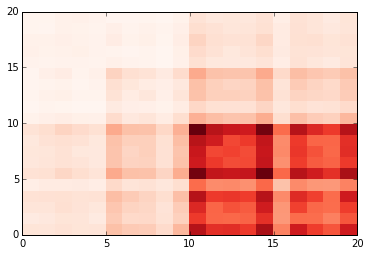

In [55]:
plt.pcolor(Corr[::-1],cmap=plt.cm.Reds)
plt.show()
plt.close()

# Estimation procedure

In [96]:
from whma.solver import admm
import whma.prox as prox
X0 = np.eye(d)
#X0 = np.ones(d**2).reshape(d,d)
rho = 0.01
maxiter = 10000

## objective = squared Frobenius

In [97]:
# main step
X_frob = admm(estim, prox.sq_frob, X0, X0, Alpha_truth, rho=rho, maxiter=maxiter)

||X1 - X_2|| =  1.43172544581e-15
||X2 - X_3|| =  1.44891369188e-15
||U1|| =  0.0464121481956
||U2|| =  0.00896961152336
||U3|| =  8.25120507874e-15
||U4|| =  0.0224549385098
||U5|| =  0.011198085575


/Users/massil/Programmation/git/whma/solver.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  X4[:] = upd.update_X4(Y2, U5, B)
/Users/massil/Programmation/git/whma/solver.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  Y1[:] = upd.update_Y1(X1, Y2, U1, U4, diagA, C)
/Users/massil/Programmation/git/whma/solver.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  U1[:] = upd.update_U1(U1, Y1, Y2, C)
/Users/massil/Programmation/git/whma/solver.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  U5[:] = upd.update_U5(U5, X4, Y2, B)


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


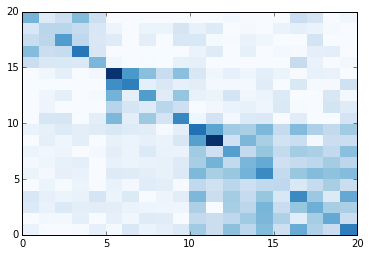

In [98]:
plt.pcolor(X_frob[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

In [99]:
print("RelErr = ", rel_err(Alpha_truth, X_frob))
print("RankCorr = ", rank_corr(Alpha_truth, X_frob))

RelErr =  0.905584770052
RankCorr =  0.297729544044


## objective = \ell_1 norm

In [100]:
# main step
X_l1 = admm(estim, prox.l1, X0, X0, Alpha_truth, rho=rho, maxiter=maxiter)

||X1 - X_2|| =  6.64423532386e-08
||X2 - X_3|| =  3.92624772979e-15
||U1|| =  0.634964012412
||U2|| =  0.00866502548326
||U3|| =  2.35064300192e-15
||U4|| =  0.334741159354
||U5|| =  0.101424583962


/Users/massil/Programmation/git/whma/solver.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  X4[:] = upd.update_X4(Y2, U5, B)
/Users/massil/Programmation/git/whma/solver.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  Y1[:] = upd.update_Y1(X1, Y2, U1, U4, diagA, C)
/Users/massil/Programmation/git/whma/solver.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  U1[:] = upd.update_U1(U1, Y1, Y2, C)
/Users/massil/Programmation/git/whma/solver.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  U5[:] = upd.update_U5(U5, X4, Y2, B)


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


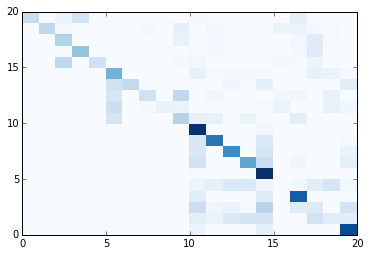

In [101]:
plt.pcolor(X_l1[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

In [102]:
print("RelErr = ", rel_err(Alpha_truth, X_l1))
print("RankCorr = ", rank_corr(Alpha_truth, X_l1))

RelErr =  1.29234619379
RankCorr =  0.259733062819


## objective = nuclear norm

In [103]:
# main step
X_nuc = admm(estim, prox.nuclear, X0, X0, Alpha_truth, rho=rho, maxiter=maxiter)

||X1 - X_2|| =  1.54635990982e-15
||X2 - X_3|| =  1.18856070319e-15
||U1|| =  0.168357004251
||U2|| =  0.0708055823917
||U3|| =  8.33400881064e-16
||U4|| =  0.0959303847324
||U5|| =  0.0686205926299


/Users/massil/Programmation/git/whma/solver.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  X4[:] = upd.update_X4(Y2, U5, B)
/Users/massil/Programmation/git/whma/solver.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  Y1[:] = upd.update_Y1(X1, Y2, U1, U4, diagA, C)
/Users/massil/Programmation/git/whma/solver.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  U1[:] = upd.update_U1(U1, Y1, Y2, C)
/Users/massil/Programmation/git/whma/solver.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  U5[:] = upd.update_U5(U5, X4, Y2, B)


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


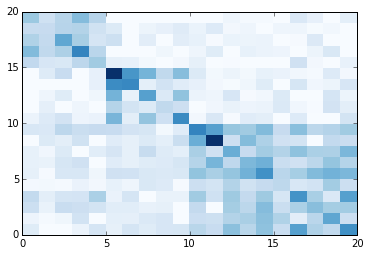

In [104]:
plt.pcolor(X_nuc[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

In [105]:
print("RelErr = ", rel_err(Alpha_truth, X_nuc))
print("RankCorr = ", rank_corr(Alpha_truth, X_nuc))

RelErr =  1.09844745859
RankCorr =  0.297979444344
